In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report)
from sklearn.metrics import roc_curve, auc
import shap
from sklearn.feature_selection import RFE
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
import shap
import warnings
import time
warnings.filterwarnings("ignore")

In [ ]:
RANDOM_STATE = 42
DATA_PATH = "/content/drive/MyDrive/Breast Cancer Tumor Classification/Breast Cancer METABRIC.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (2509, 34)


In [ ]:
print("Columns in dataset:")
print(df.columns[:-1])

Columns in dataset:
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage'],
      dtype='object')


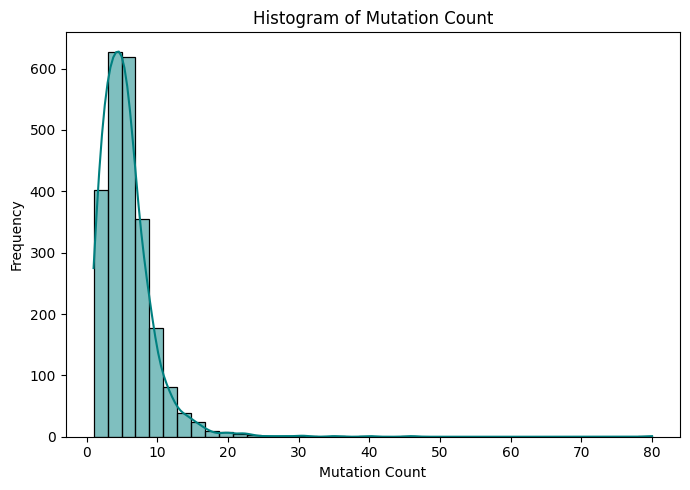

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Mutation Count"], kde=True, bins=40, color="teal")
plt.title("Histogram of Mutation Count")
plt.xlabel("Mutation Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("eda_hist_mutation_count.png")
plt.show()

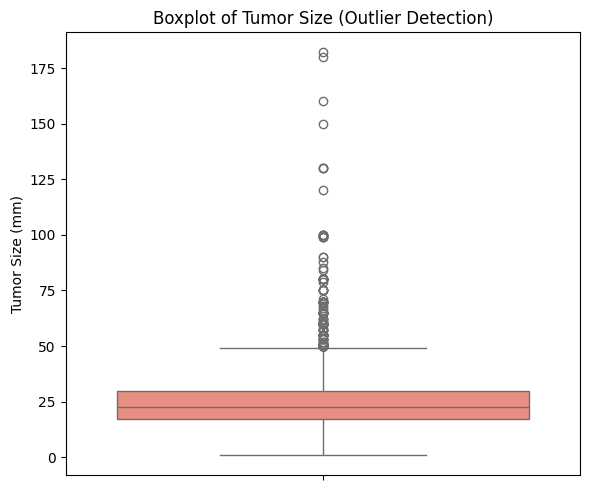

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df["Tumor Size"], color="salmon")
plt.title("Boxplot of Tumor Size (Outlier Detection)")
plt.ylabel("Tumor Size (mm)")
plt.tight_layout()
plt.savefig("eda_boxplot_tumor_size.png")
plt.show()

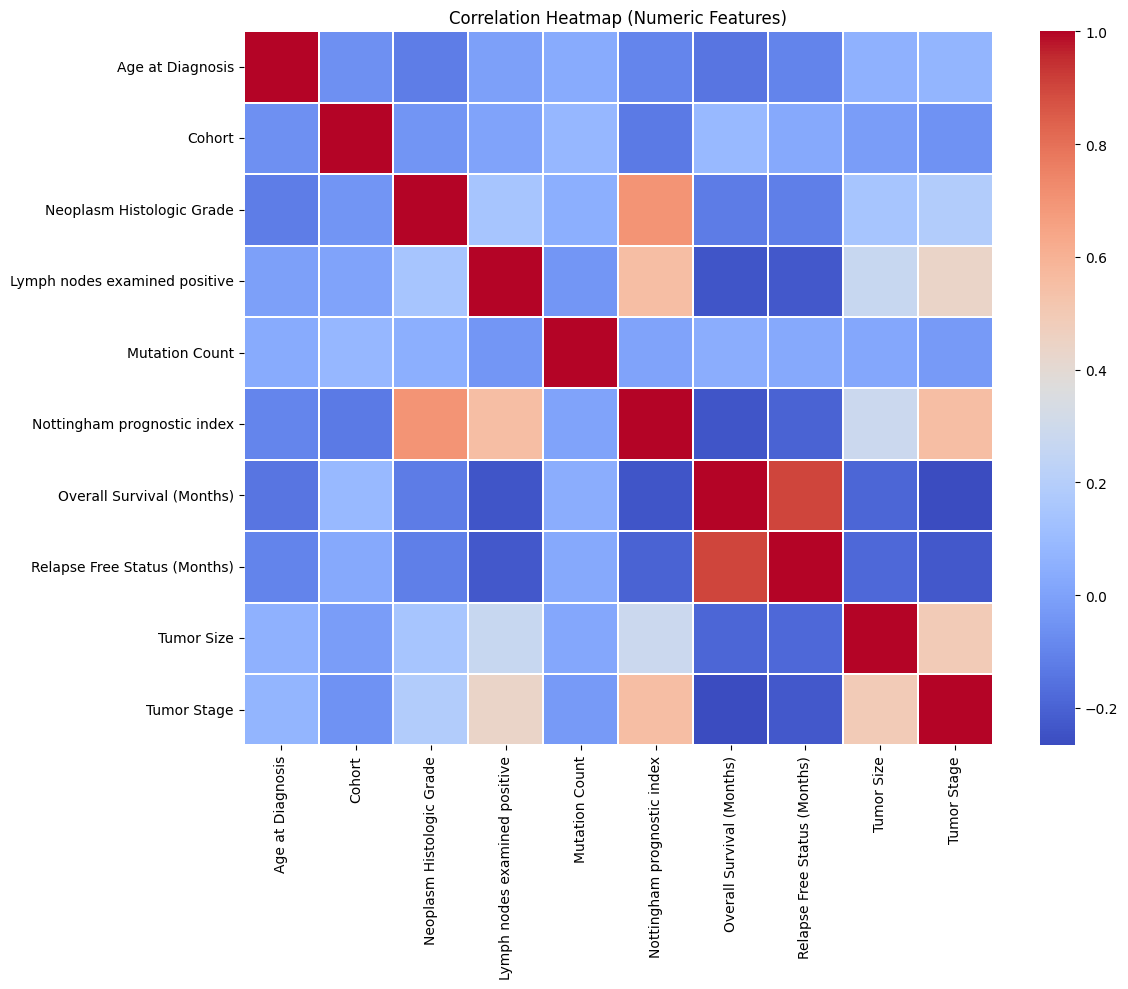

In [ ]:
numeric_df = df.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.savefig("eda_corr_heatmap.png")
plt.show()

In [ ]:
ID_COL = "Patient ID"
TARGET_COL = "Pam50 + Claudin-low subtype"
assert ID_COL in df.columns, f"{ID_COL} column not found in dataframe!"
assert TARGET_COL in df.columns, f"{TARGET_COL} column not found in dataframe!"
y = df[TARGET_COL]
X = df.drop(columns=[ID_COL, TARGET_COL])
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (2509, 32)
Target vector shape: (2509,)


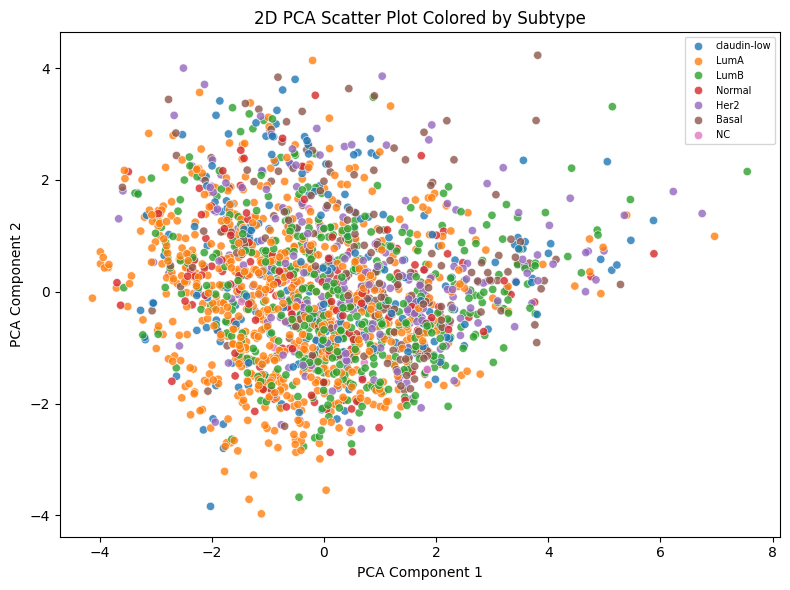

In [ ]:
numeric_filled = numeric_df.fillna(numeric_df.median())
scaler_eda = StandardScaler()
scaled_eda = scaler_eda.fit_transform(numeric_filled)
pca_eda = PCA(n_components=2)
pca_2d = pca_eda.fit_transform(scaled_eda)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_2d[:,0],
    y=pca_2d[:,1],
    hue=df[TARGET_COL],
    palette="tab10",
    alpha=0.8
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Scatter Plot Colored by Subtype")
plt.legend(loc="best", fontsize=7)
plt.tight_layout()
plt.savefig("eda_pca2d.png")
plt.show()

In [ ]:
print("Class distribution (raw counts):")
print(y.value_counts())
print("Class distribution (proportions):")
print(y.value_counts(normalize=True))

Class distribution (raw counts):
Pam50 + Claudin-low subtype
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: count, dtype: int64
Class distribution (proportions):
Pam50 + Claudin-low subtype
LumA           0.353535
LumB           0.239899
Her2           0.113131
claudin-low    0.110101
Basal          0.105556
Normal         0.074747
NC             0.003030
Name: proportion, dtype: float64


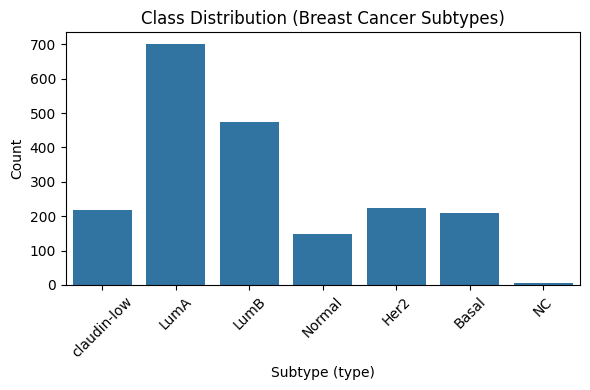

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (Breast Cancer Subtypes)")
plt.xlabel("Subtype (type)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
for c in cat_cols:
    X[c] = X[c].fillna(X[c].mode()[0])
for c in num_cols:
    X[c] = X[c].fillna(X[c].median())

In [ ]:
missing_per_column = X.isna().sum()
total_missing = missing_per_column.sum()
print("Total missing values in feature matrix:", total_missing)
if total_missing > 0:
    print("Columns with missing values (top 10):")
    print(missing_per_column[missing_per_column > 0].sort_values(ascending=False).head(10))
else:
    print("No missing values detected in the feature matrix")


Total missing values in feature matrix: 0
No missing values detected in the feature matrix


In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("Shape after one-hot:", X.shape)

Shape after one-hot: (2509, 64)


In [ ]:
print("Missing in y:", y.isna().sum())
y.value_counts(dropna=False)

Missing in y: 529


,count
Pam50 + Claudin-low subtype,
LumA,700
NaN,529
LumB,475
Her2,224
claudin-low,218
Basal,209
Normal,148
NC,6


In [ ]:
y = y.fillna(y.mode()[0])

In [ ]:
print("Missing in y after fill:", y.isna().sum())

Missing in y after fill: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (2007, 64)
Test: (502, 64)


In [ ]:
var_thresh = VarianceThreshold(threshold=0.0)
X_train_var = var_thresh.fit_transform(X_train)
X_test_var = var_thresh.transform(X_test)
print("After VarianceThreshold:")
print("X_train:", X_train_var.shape)
print("X_test:", X_test_var.shape)

After VarianceThreshold:
X_train: (2007, 64)
X_test: (502, 64)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_var)
X_test_scaled = scaler.transform(X_test_var)
print("After Standard Scaling:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)

After Standard Scaling:
X_train: (2007, 64)
X_test: (502, 64)


In [ ]:
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
print("Max PCA components allowed:", max_components)
N_COMPONENTS = min(50, max_components)
print("Using PCA components:", N_COMPONENTS)
pca = PCA(n_components=N_COMPONENTS, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("After PCA:")
print("X_train:", X_train_pca.shape)
print("X_test:", X_test_pca.shape)

Max PCA components allowed: 64
Using PCA components: 50
After PCA:
X_train: (2007, 50)
X_test: (502, 50)


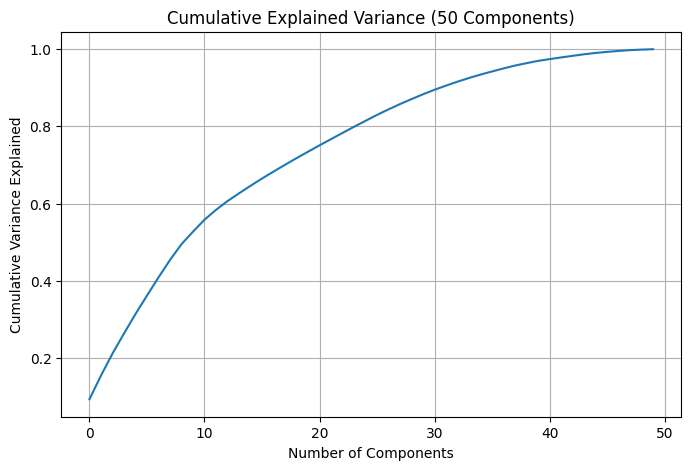


Total variance explained by PCA: 0.9991504993308638


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title(f"Cumulative Explained Variance ({N_COMPONENTS} Components)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()
print("\nTotal variance explained by PCA:",np.cumsum(pca.explained_variance_ratio_)[-1])

In [ ]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1
    )
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
    plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation score")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


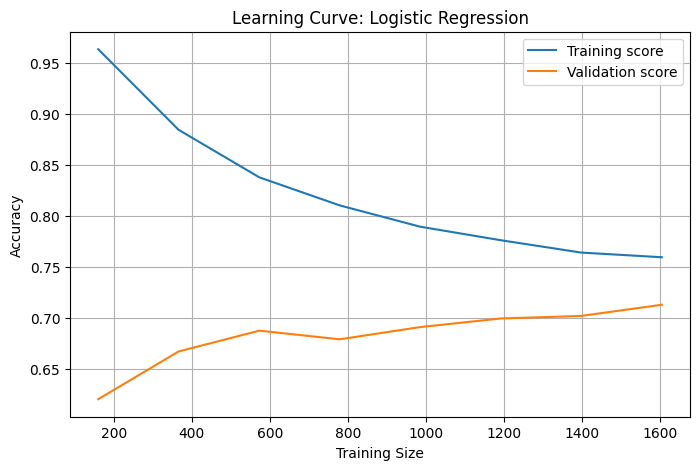

In [ ]:
plot_learning_curve(LogisticRegression(max_iter=5000), X_train_pca, y_train, "Learning Curve: Logistic Regression")

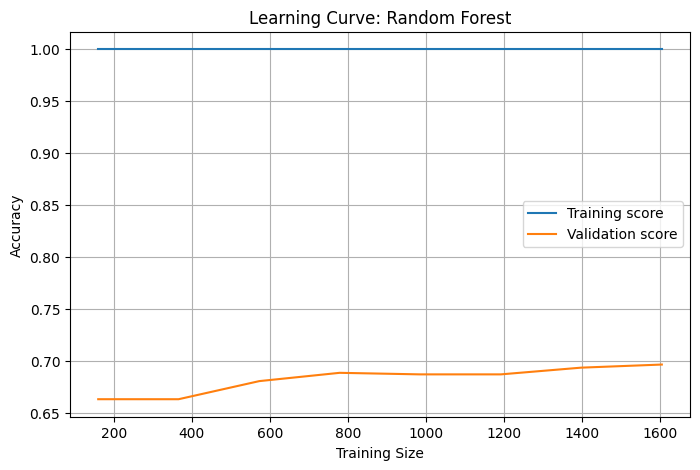

In [ ]:
plot_learning_curve(RandomForestClassifier(n_estimators=200, random_state=42), X_train_pca, y_train, "Learning Curve: Random Forest")

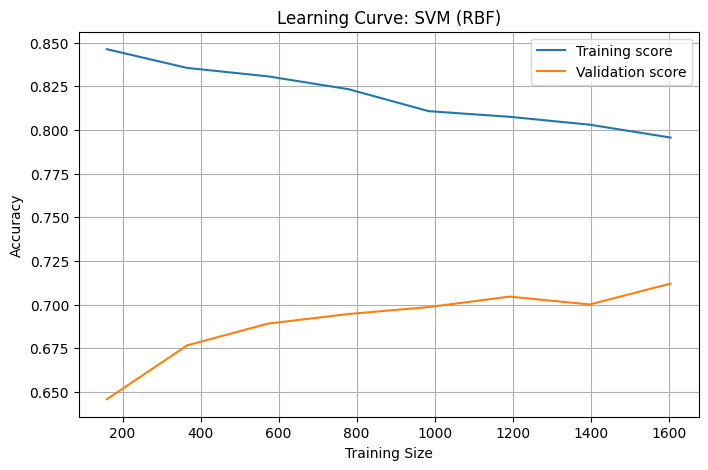

In [ ]:
plot_learning_curve(SVC(kernel="rbf"), X_train_pca, y_train, "Learning Curve: SVM (RBF)")

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
log_reg_params = {"C": [0.01, 0.1, 1, 10],"penalty": ["l2"],}
log_reg_grid = GridSearchCV(estimator=log_reg,param_grid=log_reg_params,cv=cv,scoring="roc_auc",n_jobs=-1)
print("Training Logistic Regression...")
log_reg_grid.fit(X_train_pca, y_train)
best_lr = log_reg_grid.best_estimator_
print("Best LR params:", log_reg_grid.best_params_)

Training Logistic Regression...
Best LR params: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf_params = {
    "n_estimators": [200, 400],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],}
rf_grid = GridSearchCV(estimator=rf,param_grid=rf_params,cv=cv,scoring="roc_auc",n_jobs=-1)
print("Training Random Forest...")
rf_grid.fit(X_train_pca, y_train)
best_rf = rf_grid.best_estimator_
print("Best RF params:", rf_grid.best_params_)

Training Random Forest...
Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
svm = SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE)
svm_params = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.001],
}
svm_grid = GridSearchCV(estimator=svm,param_grid=svm_params,cv=cv,scoring="roc_auc",n_jobs=-1)
print("Training SVM (RBF)...")
svm_grid.fit(X_train_pca, y_train)
best_svm = svm_grid.best_estimator_
print("Best SVM params:", svm_grid.best_params_)

Training SVM (RBF)...
Best SVM params: {'C': 0.1, 'gamma': 'scale'}


In [ ]:
models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "SVM (RBF)": best_svm
}

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    print(f"\n==================== {name} ====================")
    y_prob = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc = roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
    print(f"Accuracy:      {acc:.4f}")
    print(f"Precision:     {prec:.4f}")
    print(f"Recall:        {rec:.4f}")
    print(f"F1-score:      {f1:.4f}")
    print(f"ROC-AUC:       {roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return y_prob


==================== Logistic Regression ====================
Accuracy:      0.7291
Precision:     0.7217
Recall:        0.7291
F1-score:      0.7077
ROC-AUC:       0.9171

Classification Report:
              precision    recall  f1-score   support

       Basal       0.73      0.71      0.72        42
        Her2       0.63      0.49      0.55        45
        LumA       0.80      0.89      0.84       246
        LumB       0.61      0.72      0.66        95
          NC       0.00      0.00      0.00         1
      Normal       0.67      0.07      0.12        29
 claudin-low       0.69      0.55      0.61        44

    accuracy                           0.73       502
   macro avg       0.59      0.49      0.50       502
weighted avg       0.72      0.73      0.71       502



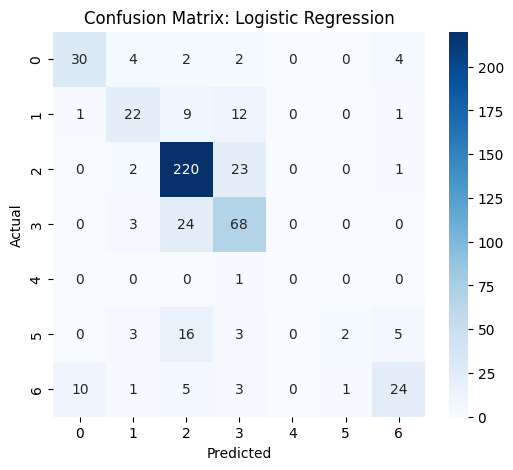

In [ ]:
lr_prob = evaluate_model("Logistic Regression", models["Logistic Regression"], X_test_pca, y_test)


==================== Random Forest ====================
Accuracy:      0.7171
Precision:     0.6672
Recall:        0.7171
F1-score:      0.6851
ROC-AUC:       0.9119

Classification Report:
              precision    recall  f1-score   support

       Basal       0.68      0.67      0.67        42
        Her2       0.62      0.40      0.49        45
        LumA       0.78      0.93      0.85       246
        LumB       0.59      0.66      0.63        95
          NC       0.00      0.00      0.00         1
      Normal       0.00      0.00      0.00        29
 claudin-low       0.69      0.50      0.58        44

    accuracy                           0.72       502
   macro avg       0.48      0.45      0.46       502
weighted avg       0.67      0.72      0.69       502



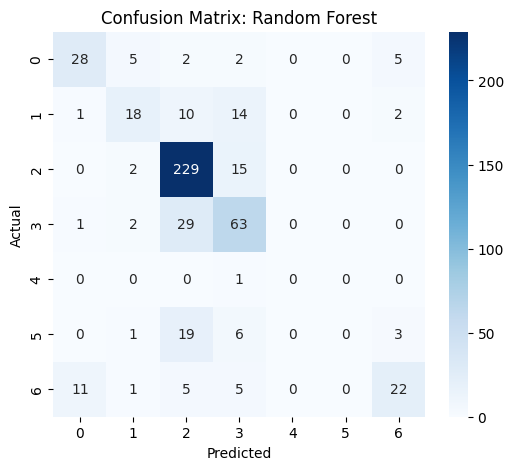

In [ ]:
rf_prob = evaluate_model("Random Forest", models["Random Forest"], X_test_pca, y_test)


==================== SVM (RBF) ====================
Accuracy:      0.6554
Precision:     0.6146
Recall:        0.6554
F1-score:      0.6074
ROC-AUC:       0.9065

Classification Report:
              precision    recall  f1-score   support

       Basal       0.74      0.60      0.66        42
        Her2       0.67      0.40      0.50        45
        LumA       0.65      0.96      0.78       246
        LumB       0.62      0.41      0.49        95
          NC       0.00      0.00      0.00         1
      Normal       0.00      0.00      0.00        29
 claudin-low       0.63      0.27      0.38        44

    accuracy                           0.66       502
   macro avg       0.47      0.38      0.40       502
weighted avg       0.61      0.66      0.61       502



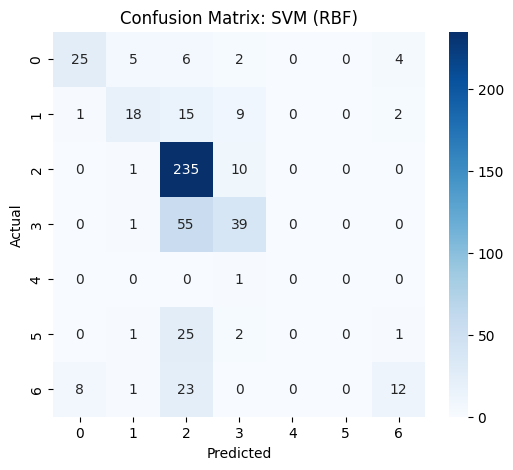

In [ ]:
svm_prob = evaluate_model("SVM (RBF)", models["SVM (RBF)"], X_test_pca, y_test)

  0%|          | 0/50 [00:00<?, ?it/s]

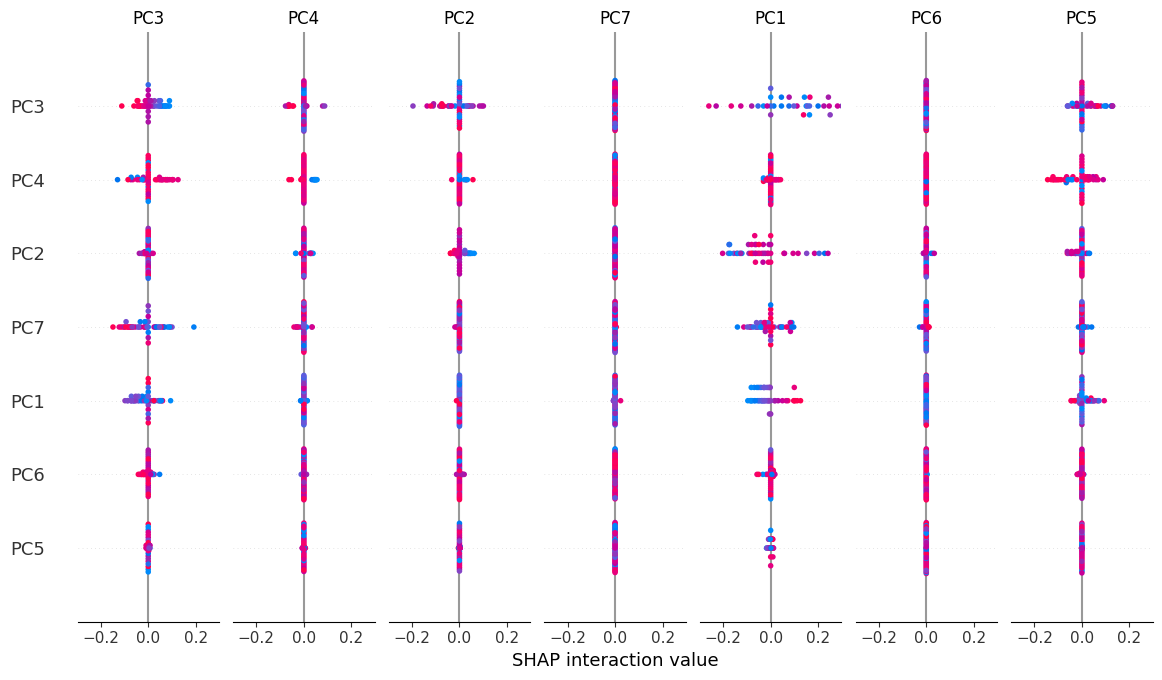

In [ ]:
shap.initjs()
explainer_lr = shap.KernelExplainer(best_lr.predict_proba, X_train_pca[:50])
shap_values_lr = explainer_lr.shap_values(X_test_pca[:50])
shap.summary_plot(shap_values_lr, X_test_pca[:50], feature_names=[f"PC{i+1}" for i in range(N_COMPONENTS)],plot_type="dot")


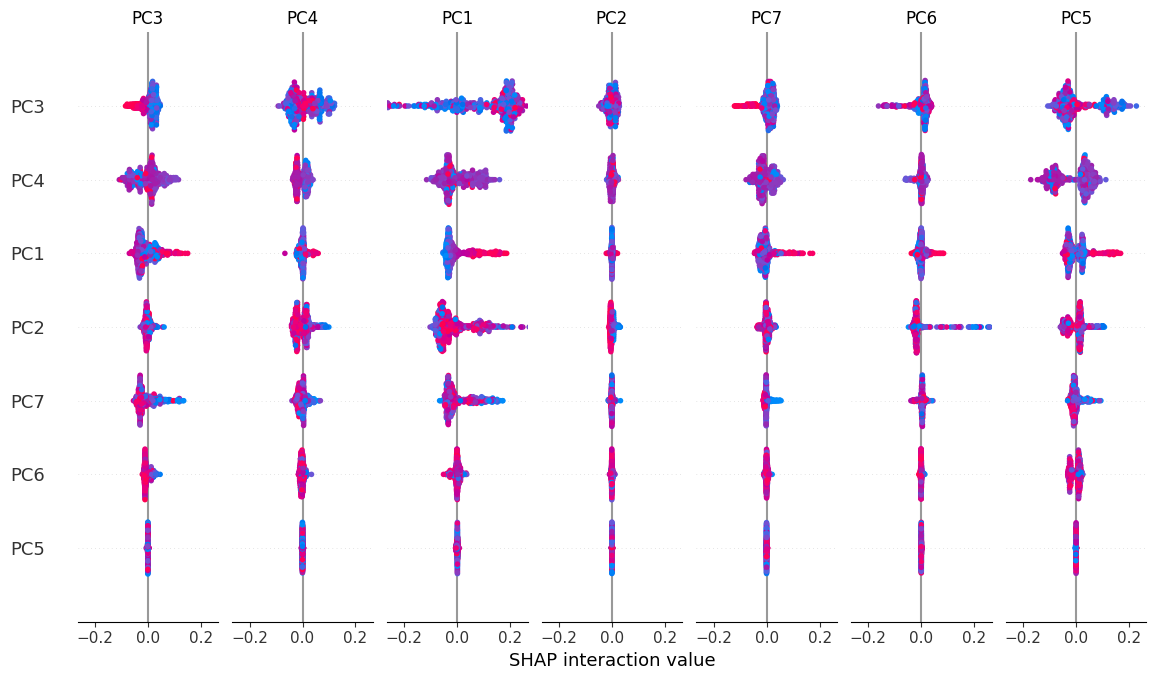

In [ ]:
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test_pca)
shap.summary_plot(shap_values_rf, X_test_pca, feature_names=[f"PC{i+1}" for i in range(N_COMPONENTS)])

In [ ]:
rfe = RFE(LogisticRegression(max_iter=5000), n_features_to_select=10)
rfe.fit(X_train_pca, y_train)
selected_pcs = np.where(rfe.support_ == True)[0]
print("Top PCA components selected by RFE:", selected_pcs)

Top PCA components selected by RFE: [ 0  2  8 13 15 32 38 43 44 49]


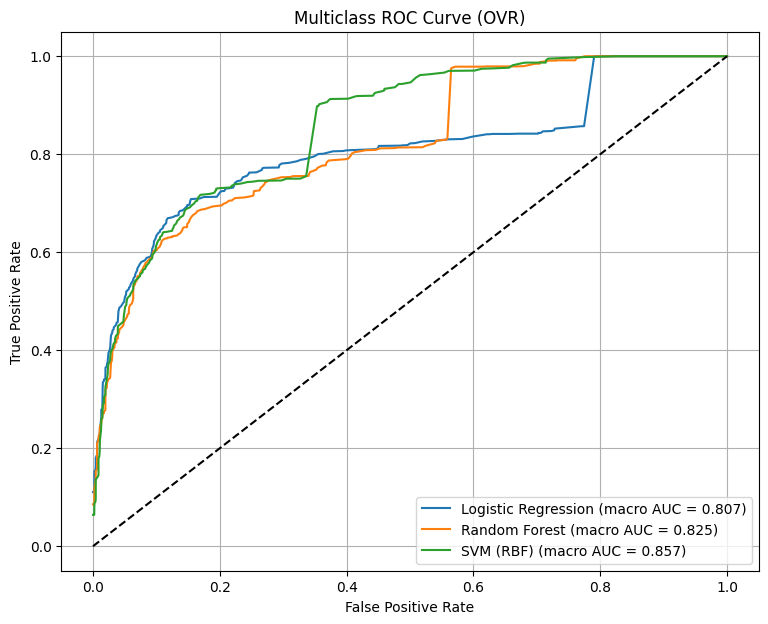

In [ ]:
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)
plt.figure(figsize=(9,7))
for model_name, y_prob in [("Logistic Regression", lr_prob),("Random Forest", rf_prob),("SVM (RBF)", svm_prob)]:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    roc_auc_macro = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{model_name} (macro AUC = {roc_auc_macro:.3f})")

plt.plot([0,1], [0,1], "k--")
plt.title("Multiclass ROC Curve (OVR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

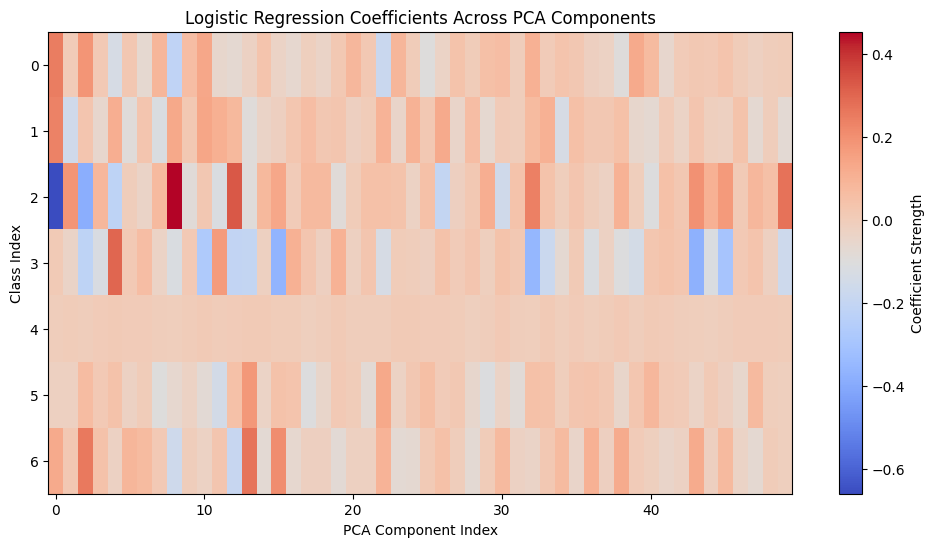

In [ ]:
best_lr = models["Logistic Regression"]
coeff = best_lr.coef_
plt.figure(figsize=(12,6))
plt.imshow(coeff, aspect='auto', cmap='coolwarm')
plt.colorbar(label="Coefficient Strength")
plt.xlabel("PCA Component Index")
plt.ylabel("Class Index")
plt.title("Logistic Regression Coefficients Across PCA Components")
plt.show()

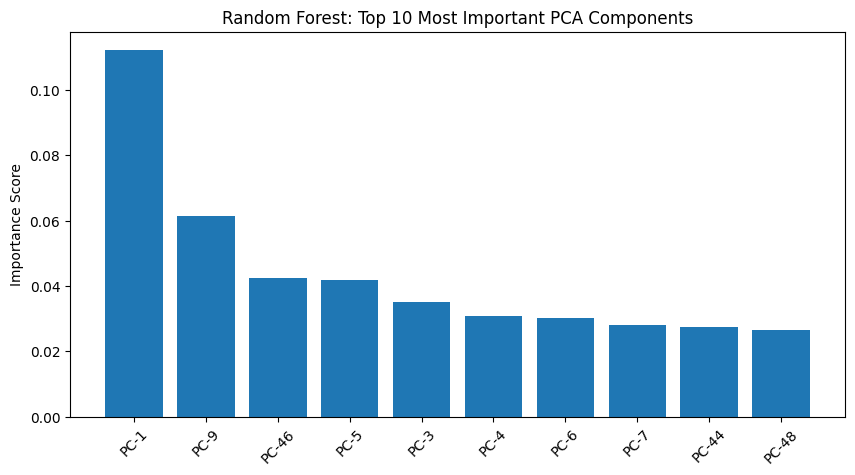

In [ ]:
best_rf = models["Random Forest"]
rf_importances = best_rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(10), rf_importances[indices[:10]])
plt.xticks(range(10), [f"PC-{i+1}" for i in indices[:10]], rotation=45)
plt.ylabel("Importance Score")
plt.title("Random Forest: Top 10 Most Important PCA Components")
plt.show()

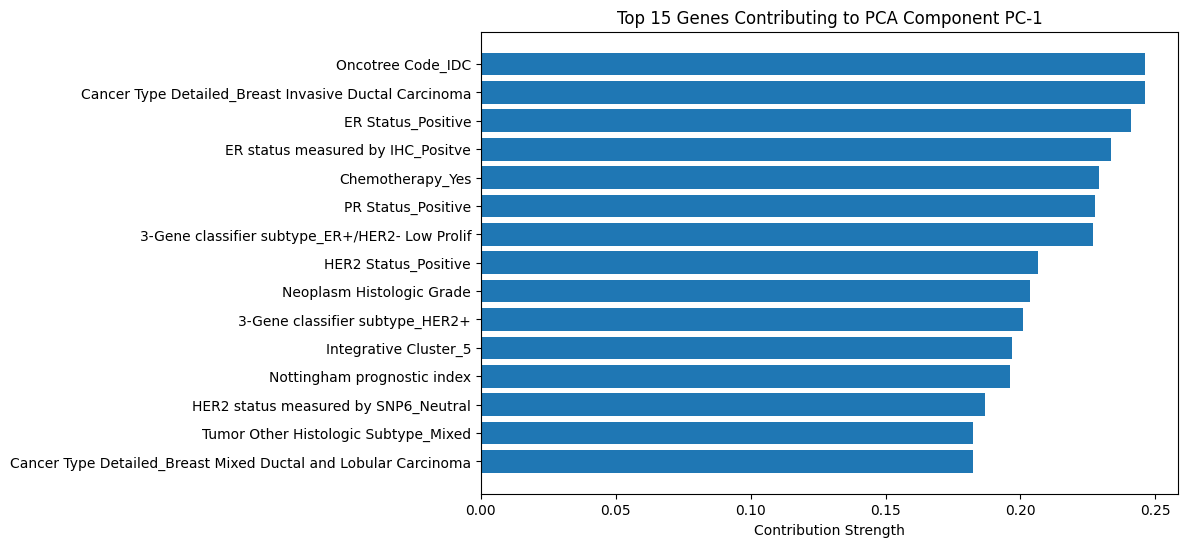

In [ ]:
top_pca = indices[0]
component_vector = pca.components_[top_pca]
gene_contrib = np.abs(component_vector)
top_gene_idx = np.argsort(gene_contrib)[-15:]
plt.figure(figsize=(9,6))
plt.barh(range(15), gene_contrib[top_gene_idx])
plt.yticks(range(15), [X.columns[i] for i in top_gene_idx])
plt.xlabel("Contribution Strength")
plt.title(f"Top 15 Genes Contributing to PCA Component PC-{top_pca+1}")
plt.show()

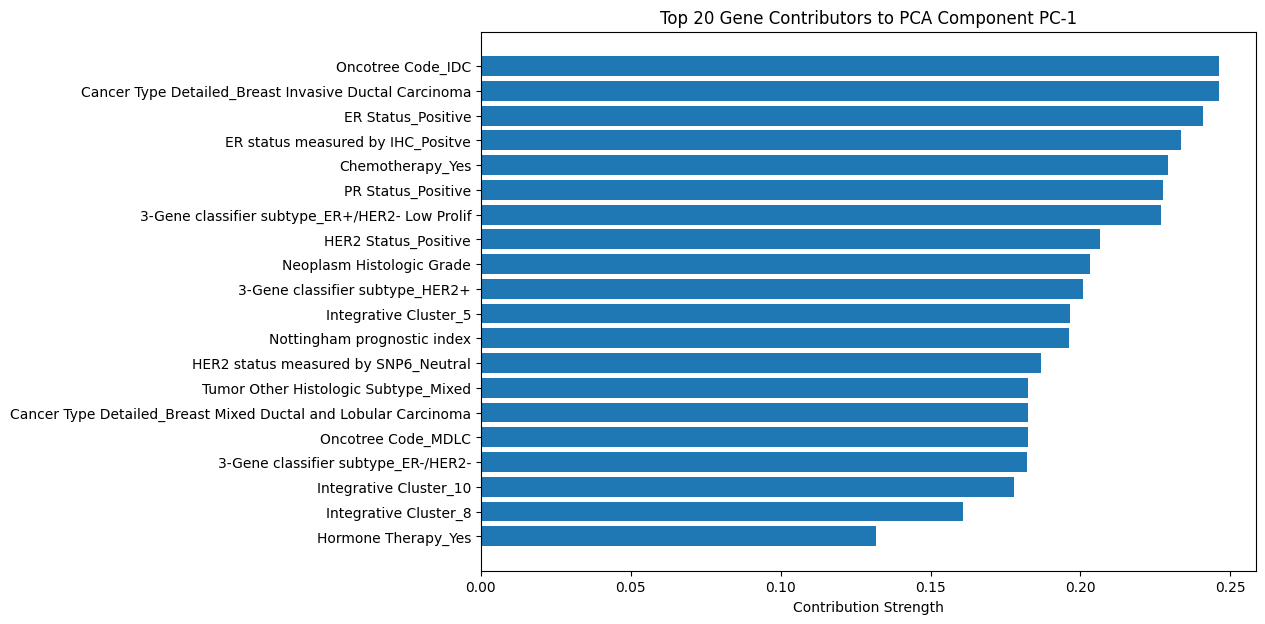

In [ ]:
top_pca_idx = indices[0]
component_vector = pca.components_[top_pca_idx]
gene_contrib = np.abs(component_vector)
top_gene_idx = np.argsort(gene_contrib)[-20:]
plt.figure(figsize=(10,7))
plt.barh(range(20), gene_contrib[top_gene_idx])
plt.yticks(range(20), [X.columns[i] for i in top_gene_idx])
plt.xlabel("Contribution Strength")
plt.title(f"Top 20 Gene Contributors to PCA Component PC-{top_pca_idx+1}")
plt.show()

In [ ]:
print("Top contributing genes:", [X.columns[i] for i in top_gene_idx])

Top contributing genes: ['Hormone Therapy_Yes', 'Integrative Cluster_8', 'Integrative Cluster_10', '3-Gene classifier subtype_ER-/HER2-', 'Oncotree Code_MDLC', 'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma', 'Tumor Other Histologic Subtype_Mixed', 'HER2 status measured by SNP6_Neutral', 'Nottingham prognostic index', 'Integrative Cluster_5', '3-Gene classifier subtype_HER2+', 'Neoplasm Histologic Grade', 'HER2 Status_Positive', '3-Gene classifier subtype_ER+/HER2- Low Prolif', 'PR Status_Positive', 'Chemotherapy_Yes', 'ER status measured by IHC_Positve', 'ER Status_Positive', 'Cancer Type Detailed_Breast Invasive Ductal Carcinoma', 'Oncotree Code_IDC']


In [ ]:
def compute_metrics(name, model, X_test, y_test):
    y_prob = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (weighted)": precision_score(y_test, y_pred, average="weighted"),
        "Recall (weighted)": recall_score(y_test, y_pred, average="weighted"),
        "F1-score (weighted)": f1_score(y_test, y_pred, average="weighted"),
        "ROC-AUC (OVR)": roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
    }

results = []
results.append(compute_metrics("Logistic Regression", models["Logistic Regression"], X_test_pca, y_test))
results.append(compute_metrics("Random Forest", models["Random Forest"], X_test_pca, y_test))
results.append(compute_metrics("SVM (RBF)", models["SVM (RBF)"], X_test_pca, y_test))
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision (weighted),Recall (weighted),F1-score (weighted),ROC-AUC (OVR)
0,Logistic Regression,0.729084,0.721689,0.729084,0.707654,0.917144
1,Random Forest,0.717131,0.667208,0.717131,0.685059,0.911903
2,SVM (RBF),0.655378,0.614566,0.655378,0.607370,0.906501


In [ ]:
def measure_time(model, X_train, y_train, X_test):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    start = time.time()
    model.predict(X_test)
    infer_time = time.time() - start
    return train_time, infer_time

In [ ]:
lr_train, lr_infer = measure_time(best_lr, X_train_pca, y_train, X_test_pca)
rf_train, rf_infer = measure_time(best_rf, X_train_pca, y_train, X_test_pca)
svm_train, svm_infer = measure_time(best_svm, X_train_pca, y_train, X_test_pca)
print("Logistic Regression:", lr_train, lr_infer)
print("Random Forest:", rf_train, rf_infer)
print("SVM:", svm_train, svm_infer)

Logistic Regression: 0.06849288940429688 0.0005886554718017578
Random Forest: 2.7162587642669678 0.01984381675720215
SVM: 0.9116151332855225 0.04627275466918945
